# S04 T02: Visualització gràfica de Múltiples variables

## Nivell 1
- Exercici 1: Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".

In [2]:
# "Realitza"?? He repassat el Notebook "03 EXAMINING DATA" un parell de cops! S'ha de fer alguna cosa més?

## Nivell 2
- Exercici 2: Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [4]:
# Obrim la base de dades
movies = pd.read_table(r'..\DB\movies.dat', sep = r'::', 
                       header = None, names=['num','film','genre'],
                       index_col=0)
movies

,film,genre
num,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
...,...,...
3948,Meet the Parents (2000),Comedy
3949,Requiem for a Dream (2000),Drama
3950,Tigerland (2000),Drama


In [5]:
#Info que s'extreu al notebook d'Examining Data
print("Shape: " + str(movies.shape))
print("Columns: " + str(movies.columns))
movies.describe()

Shape: (3883, 2)
Columns: Index(['film', 'genre'], dtype='object')


,film,genre
count,3883,3883
unique,3883,301
top,Friday the 13th Part VI: Jason Lives (1986),Drama
freq,1,843


In [6]:
#Separarem l'any en una columna nova. str.rsplit separa desde el final!
a = movies.film.str.rsplit('(', n=1, expand=True) #movies['film']
a[1]=a[1].str.strip(')') #esborrem el parentesis final
a.columns = ['title','year']
a

,title,year
num,,
1,Toy Story,1995
2,Jumanji,1995
3,Grumpier Old Men,1995
4,Waiting to Exhale,1995
5,Father of the Bride Part II,1995
...,...,...
3948,Meet the Parents,2000
3949,Requiem for a Dream,2000
3950,Tigerland,2000


In [7]:
#farem el mateix amb el 'genre': ho separarem en diferents columnes per poder treballar més fàcilment
b = movies.genre.str.split('|', expand=True)
b.columns = ['genre' + str(x) for x in range(len(b.columns))]
b

,genre0,genre1,genre2,genre3,genre4,genre5
num,,,,,,
1,Animation,Children's,Comedy,None,None,None
2,Adventure,Children's,Fantasy,None,None,None
3,Comedy,Romance,None,None,None,None
4,Comedy,Drama,None,None,None,None
5,Comedy,None,None,None,None,None
...,...,...,...,...,...,...
3948,Comedy,None,None,None,None,None
3949,Drama,None,None,None,None,None
3950,Drama,None,None,None,None,None


In [8]:
# Canviem els valors "None" per "NaN"
b = b.fillna(value=np.nan)
b

,genre0,genre1,genre2,genre3,genre4,genre5
num,,,,,,
1,Animation,Children's,Comedy,NaN,NaN,NaN
2,Adventure,Children's,Fantasy,NaN,NaN,NaN
3,Comedy,Romance,NaN,NaN,NaN,NaN
4,Comedy,Drama,NaN,NaN,NaN,NaN
5,Comedy,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3948,Comedy,NaN,NaN,NaN,NaN,NaN
3949,Drama,NaN,NaN,NaN,NaN,NaN
3950,Drama,NaN,NaN,NaN,NaN,NaN


In [9]:
#Combinem el df movies amb els nous que hem preparat ("a" i "b")
new_movies = pd.concat([movies, a, b], axis = 1)
new_movies

,film,genre,title,year,genre0,genre1,genre2,genre3,genre4,genre5
num,,,,,,,,,,
1,Toy Story (1995),Animation|Children's|Comedy,Toy Story,1995,Animation,Children's,Comedy,NaN,NaN,NaN
2,Jumanji (1995),Adventure|Children's|Fantasy,Jumanji,1995,Adventure,Children's,Fantasy,NaN,NaN,NaN
3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995,Comedy,Romance,NaN,NaN,NaN,NaN
4,Waiting to Exhale (1995),Comedy|Drama,Waiting to Exhale,1995,Comedy,Drama,NaN,NaN,NaN,NaN
5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995,Comedy,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3948,Meet the Parents (2000),Comedy,Meet the Parents,2000,Comedy,NaN,NaN,NaN,NaN,NaN
3949,Requiem for a Dream (2000),Drama,Requiem for a Dream,2000,Drama,NaN,NaN,NaN,NaN,NaN
3950,Tigerland (2000),Drama,Tigerland,2000,Drama,NaN,NaN,NaN,NaN,NaN


In [10]:
#Info que s'extreu al notebook d'Examining Data amb el nou DataFrame
print("Shape:\n" + str(new_movies.shape) + "\n")
print("Columns:\n" + str(new_movies.columns) + "\n")
print("Description:\n" + str(new_movies.describe()) + "\n")
new_movies.info()

Shape:
(3883, 10)

Columns:
Index(['film', 'genre', 'title', 'year', 'genre0', 'genre1', 'genre2',
       'genre3', 'genre4', 'genre5'],
      dtype='object')

Description:
                                               film  genre    title  year  \
count                                          3883   3883     3883  3883   
unique                                         3883    301     3841    81   
top     Friday the 13th Part VI: Jason Lives (1986)  Drama  Hamlet   1996   
freq                                              1    843        5   345   

       genre0 genre1    genre2    genre3    genre4 genre5  
count    3883   1858       536       115        15      1  
unique     18     17        15        13         6      1  
top     Drama  Drama  Thriller  Thriller  Thriller    War  
freq     1176    381       120        40         3      1  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 1 to 3952
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtyp

In [11]:
# hem de passar els anys a int!! 
type(new_movies['year'][1])

str

In [12]:
new_movies['year'] = pd.to_datetime(new_movies['year'], format='%Y')
new_movies['year'] = pd.DatetimeIndex(new_movies['year']).year
#es pot utilitzar també:
#new_movies['year'] = new_movies['year'].astype(int)
print(type(new_movies['year'][1]))
# i ordenarem les dades per any
new_movies.sort_values(by=['year'], ascending = False, inplace = True)
new_movies

<class 'numpy.int64'>


,film,genre,title,year,genre0,genre1,genre2,genre3,genre4,genre5
num,,,,,,,,,,
3952,"Contender, The (2000)",Drama|Thriller,"Contender, The",2000,Drama,Thriller,NaN,NaN,NaN,NaN
3597,Whipped (2000),Comedy,Whipped,2000,Comedy,NaN,NaN,NaN,NaN,NaN
3646,Big Momma's House (2000),Comedy,Big Momma's House,2000,Comedy,NaN,NaN,NaN,NaN,NaN
3239,Isn't She Great? (2000),Comedy,Isn't She Great?,2000,Comedy,NaN,NaN,NaN,NaN,NaN
3624,Shanghai Noon (2000),Action,Shanghai Noon,2000,Action,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3309,"Dog's Life, A (1920)",Comedy,"Dog's Life, A",1920,Comedy,NaN,NaN,NaN,NaN,NaN
3231,"Saphead, The (1920)",Comedy,"Saphead, The",1920,Comedy,NaN,NaN,NaN,NaN,NaN
2823,"Spiders, The (Die Spinnen, 1. Teil: Der Golden...",Action|Drama,"Spiders, The (Die Spinnen, 1. Teil: Der Golden...",1919,Action,Drama,NaN,NaN,NaN,NaN


In [13]:
movies_year = new_movies['year'].value_counts().sort_index()
movies_year

1919      3
1920      2
1921      1
1922      2
1923      3
       ... 
1996    345
1997    315
1998    337
1999    283
2000    156
Name: year, Length: 81, dtype: int64

In [14]:
#plt.style.use('dark_background')
plt.rcParams.update({'font.size': 16, 'figure.figsize': (18, 8)}) # set font and plot size to be larger
sns.set_theme(style='darkgrid', palette = "husl")

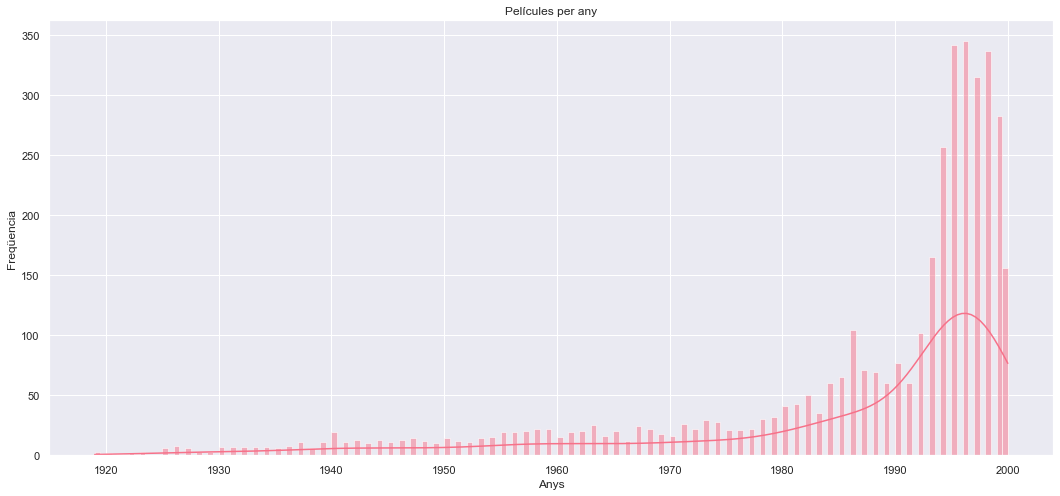

In [15]:
# Com es tracta de variables categòriques (excepte 'year'), un scatterplot no serviria.
anys = sns.histplot(new_movies, x = 'year', binwidth=.5, kde=True) 
plt.title("Películes per any")
plt.xlabel('Anys')
plt.ylabel('Freqüencia')
plt.show()
anys.figure.savefig(r"Plots\01_Películes_per_any_hist.png") 

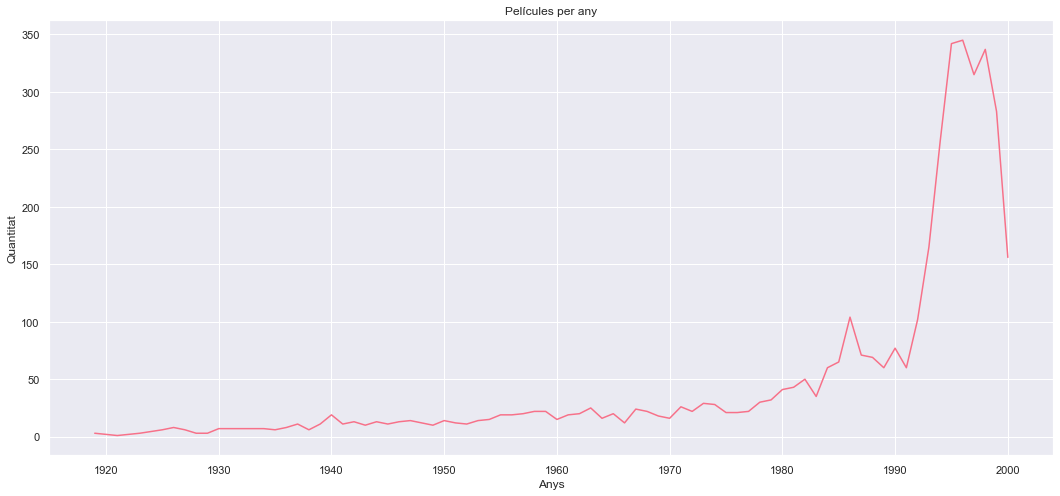

In [16]:
#Podem fer també una gràfica "de tota la vida":
anys_2 = sns.lineplot(x = movies_year.index, y = movies_year.values)
plt.title("Películes per any")
plt.xlabel('Anys')
plt.ylabel('Quantitat')
plt.show()
anys.figure.savefig(r"Plots\02_Películes_per_any_line.png")

In [17]:
#Crearem una nova columna amb la longitud del títol
new_movies['title_len'] = new_movies['title'].str.count('.')
new_movies['title_len']

num
3952    15
3597     8
3646    18
3239    17
3624    14
        ..
3309    14
3231    13
2823    53
3132    16
2821    16
Name: title_len, Length: 3883, dtype: int64

In [18]:
print("La longitud mitjana dels titols és: " + 
      str(round(new_movies['title_len'].mean(), 2)) + 
      " caracters.")

La longitud mitjana dels titols és: 18.2 caracters.


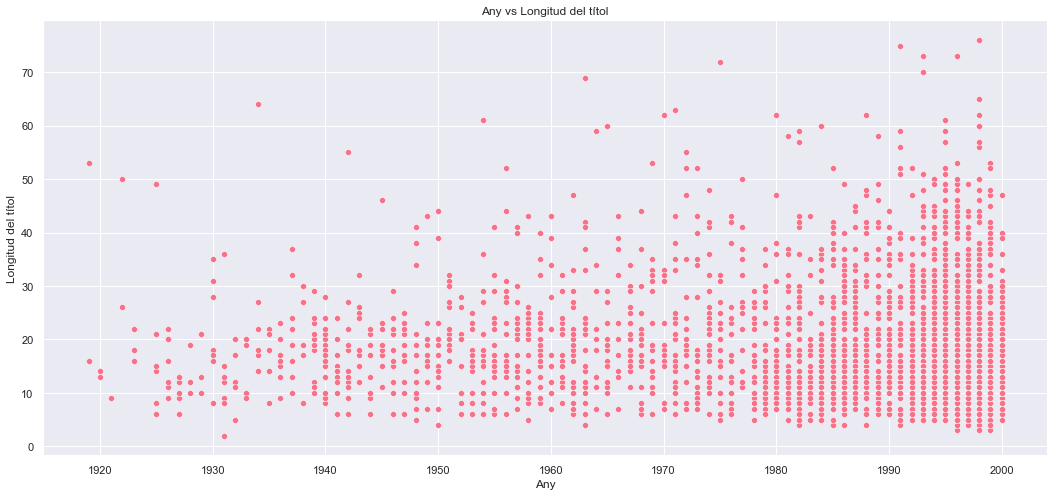

In [19]:
#Ara podem fer un scatterplot, per veure si està relacionada la data de la película amb la longitud del titol
anys_len = sns.scatterplot(new_movies['year'], new_movies['title_len'])
plt.title('Any vs Longitud del títol')
plt.xlabel('Any')
plt.ylabel('Longitud del títol')
plt.show()
anys_len.figure.savefig(r"Plots\03_Anys_vs_Longitud_del_titol_scatter.png")

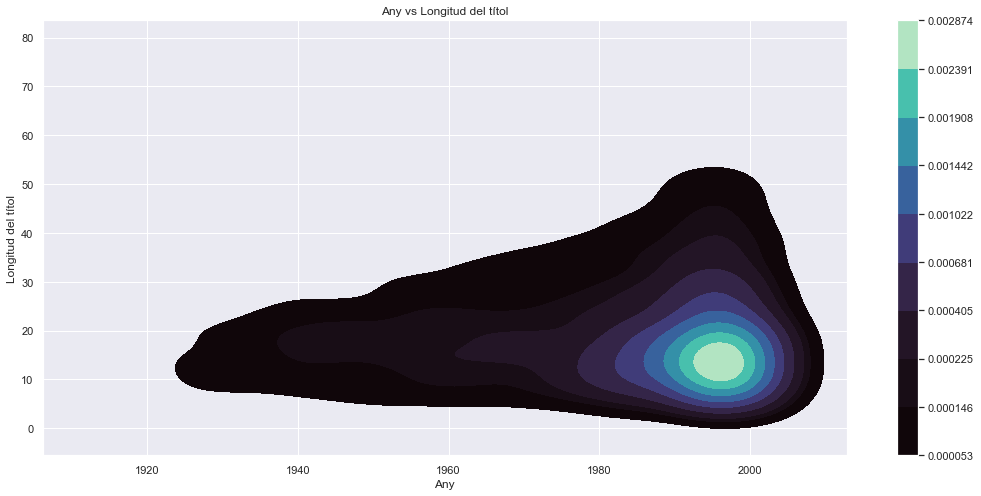

In [20]:
#Veiem que la gràfica no és prou clara
anys_len_2d = sns.kdeplot(data = new_movies, x = 'year', y = 'title_len', 
                         fill = True, cmap = 'mako', cbar = True)
plt.title('Any vs Longitud del títol')
plt.xlabel('Any')
plt.ylabel('Longitud del títol')
plt.show()
anys_len_2d.figure.savefig(r"Plots\04_Anys_vs_Longitud_del_titol_2D.png")

In [21]:
# Ara treballarem amb els gèneres

#fem un llistat entre totes les columnes dels valors posibles per a gènere
genres = pd.unique(new_movies[['genre0','genre1','genre2','genre3','genre4','genre5']].values.ravel())
genres

array(['Drama', 'Thriller', nan, 'Comedy', 'Action', 'Romance',
       'Animation', "Children's", 'Crime', 'Sci-Fi', 'Horror', 'Mystery',
       'Adventure', 'War', 'Documentary', 'Fantasy', 'Musical', 'Western',
       'Film-Noir'], dtype=object)

In [22]:
#Eliminem el "NaN"
genres = np.delete(genres, [2])
genres.sort()
genres

array(['Action', 'Adventure', 'Animation', "Children's", 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'], dtype=object)

In [23]:
genre_0 = new_movies.groupby('genre0').count()
genre_0

,film,genre,title,year,genre1,genre2,genre3,genre4,genre5,title_len
genre0,,,,,,,,,,
Action,503,503,503,503,438,234,69,9,1,503
Adventure,155,155,155,155,138,68,19,4,0,155
Animation,90,90,90,90,88,41,10,2,0,90
Children's,89,89,89,89,84,20,1,0,0,89
Comedy,1024,1024,1024,1024,503,83,6,0,0,1024
Crime,131,131,131,131,105,33,7,0,0,131
Documentary,123,123,123,123,7,0,0,0,0,123
Drama,1176,1176,1176,1176,333,31,3,0,0,1176
Fantasy,2,2,2,2,1,0,0,0,0,2


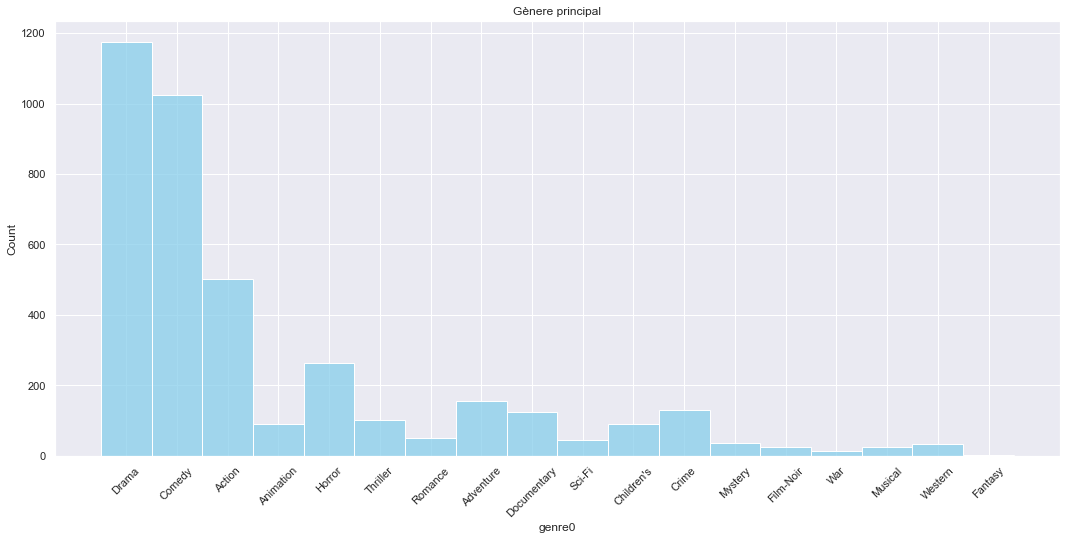

In [24]:
fig1 = sns.histplot(data=new_movies, x='genre0', color='skyblue')
plt.xticks(rotation = 45)
plt.title('Gènere principal')
plt.show()

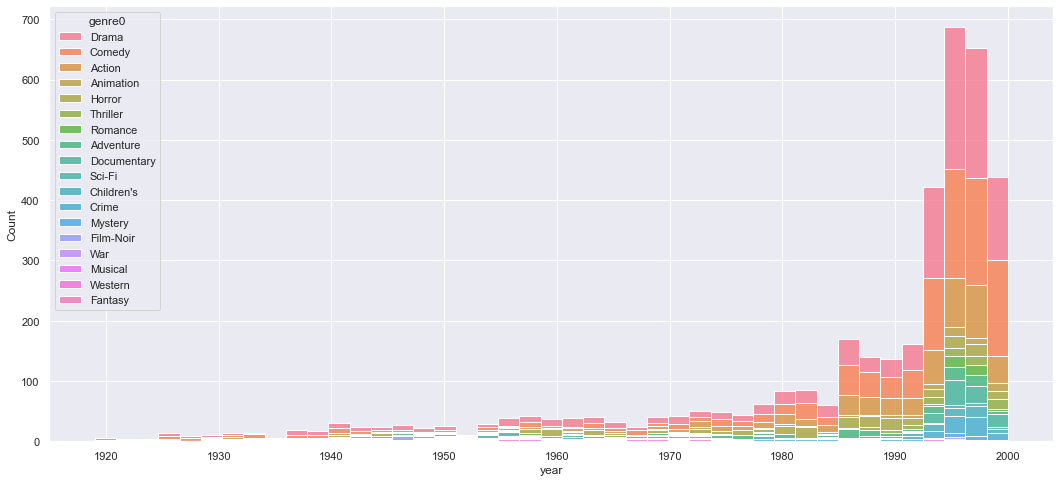

In [ ]:
fig2 = sns.histplot(data=new_movies, x='year', hue='genre0', multiple='stack')
plt.show()

Arribat aquest punt, i després de donar-li moltes voltes a com utilitzar les columnes dels gèneres per representar-les gràficament, crec que haig de cambiar de manera d'enfocar-ho.

In [ ]:
g0 = new_movies[['year', 'title', 'genre0']].dropna().drop(columns='genre0')
g0['genre'] = new_movies['genre0']

g1 = new_movies[['year', 'title', 'genre1']].dropna().drop(columns='genre1')
g1['genre'] =  new_movies['genre1']

g2 = new_movies[['year', 'title', 'genre2']].dropna().drop(columns='genre2')
g2['genre'] =  new_movies['genre2']

g3 = new_movies[['year', 'title', 'genre3']].dropna().drop(columns='genre3')
g3['genre'] =  new_movies['genre3']

g4 = new_movies[['year', 'title', 'genre4']].dropna().drop(columns='genre4')
g4['genre'] =  new_movies['genre4']

g5 = new_movies[['year', 'title', 'genre5']].dropna().drop(columns='genre5')
g5['genre'] =  new_movies['genre5']

movies_genre = pd.concat([g0, g1, g2, g3, g4, g5], axis = 0).sort_values(by='year')
movies_genre

,year,title,genre
num,,,
2821,1919,Male and Female,Drama
2821,1919,Male and Female,Adventure
3132,1919,Daddy Long Legs,Comedy
2823,1919,"Spiders, The (Die Spinnen, 1. Teil: Der Golden...",Action
2823,1919,"Spiders, The (Die Spinnen, 1. Teil: Der Golden...",Drama
...,...,...,...
3285,2000,"Beach, The",Adventure
3553,2000,Gossip,Drama
3554,2000,Love and Basketball,Drama


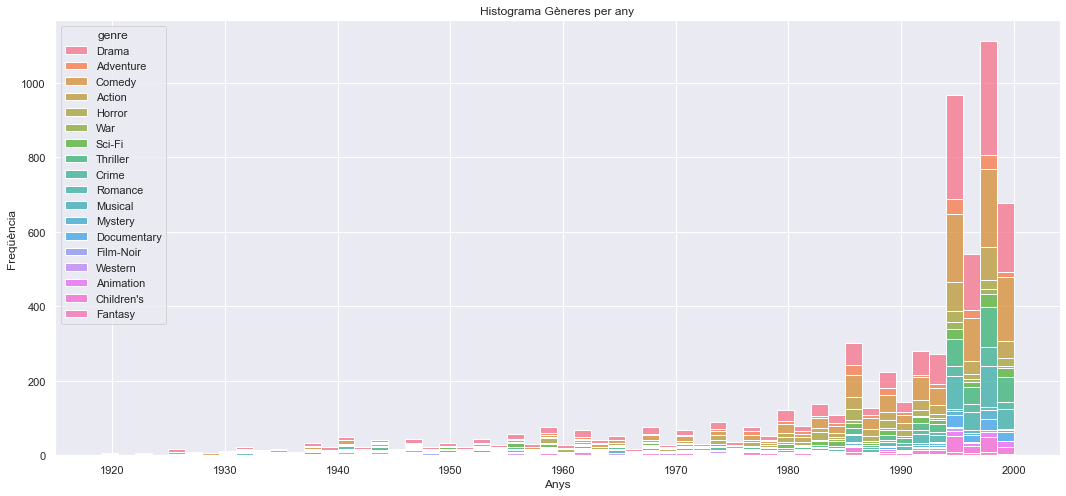

In [ ]:
fig3 = sns.histplot(data=movies_genre, x='year', stat='count', hue='genre', multiple='stack')
plt.title('Histograma Gèneres per any')
plt.xlabel('Anys')
plt.ylabel('Freqüència')
plt.show
fig3.figure.savefig(r"Plots\05_Gèneres_per_any_hist.png")

## Nivell 3
- Exercici 3: Mostreu-me la teva creativitat, Sorprèn-me amb el dataset "movies.dat" del exercici anterior.

In [ ]:
#Probarem de fer un heatmap
movies_genre['suma'] = 1
proba = movies_genre.groupby(['year','genre'])['suma'].sum().rename('suma') #agrupem per any i gènere i passem a DF
proba = proba.to_frame()
print(proba.info())
proba

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 904 entries, (1919, 'Action') to (2000, 'War')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   suma    904 non-null    int64
dtypes: int64(1)
memory usage: 9.7+ KB
None


suma
year genre          
1919 Action        1
     Adventure     1
     Comedy        1
     Drama         2
1920 Comedy        2
...              ...
2000 Mystery       1
     Romance      17
     Sci-Fi       10
     Thriller     25
     War           2

[904 rows x 1 columns]

In [ ]:
#arreglem el dataframe "proba" per poder treballar amb ella
proba.reset_index(inplace=True)
print(proba.info())
proba

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    904 non-null    int64 
 1   genre   904 non-null    object
 2   suma    904 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 21.3+ KB
None


,year,genre,suma
0,1919,Action,1
1,1919,Adventure,1
2,1919,Comedy,1
3,1919,Drama,2
4,1920,Comedy,2
...,...,...,...
899,2000,Mystery,1
900,2000,Romance,17
901,2000,Sci-Fi,10
902,2000,Thriller,25


In [ ]:
#Ho convertim en una "pivot table" per poder fer el heatmap
proba = proba.pivot('year', 'genre', 'suma')
proba

genre,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,
1919,1.0,1.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1921,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1923,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,37.0,22.0,7.0,20.0,115.0,23.0,19.0,150.0,5.0,2.0,12.0,7.0,6.0,48.0,14.0,45.0,8.0,1.0
1997,43.0,22.0,6.0,22.0,98.0,26.0,11.0,139.0,6.0,2.0,10.0,5.0,15.0,52.0,18.0,55.0,10.0,NaN
1998,44.0,16.0,8.0,18.0,112.0,25.0,18.0,166.0,2.0,3.0,15.0,3.0,10.0,58.0,17.0,51.0,5.0,1.0


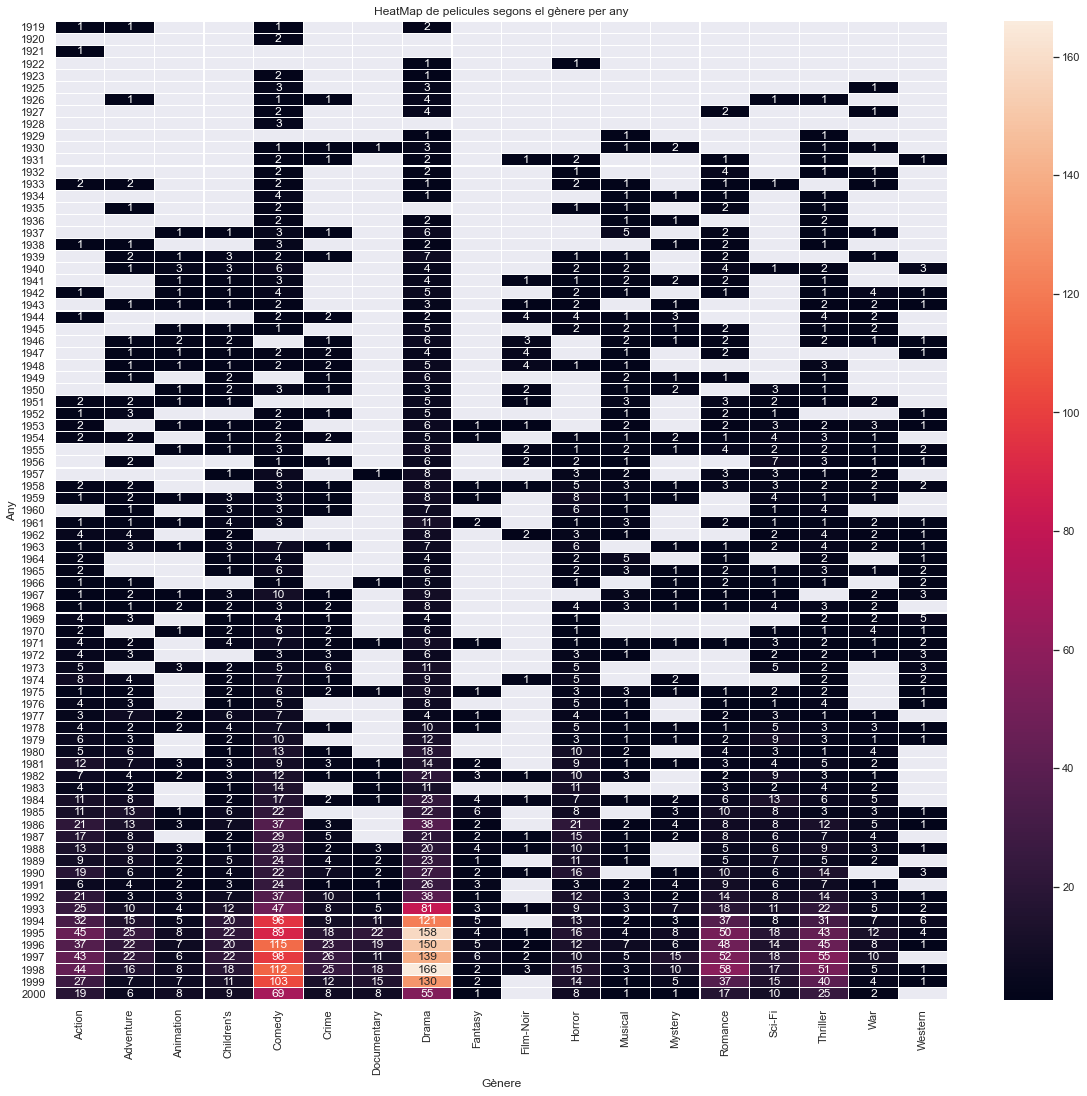

In [ ]:
#creem el heatmap
fig4 = plt.subplots(figsize=(20, 18))
fig4 = sns.heatmap(proba, annot=True, fmt='.0f', linewidths=0.1, linecolor="w")
plt.xlabel('Gènere')
plt.ylabel('Any')
plt.title('HeatMap de pelicules segons el gènere per any')
plt.show()
fig4.figure.savefig(r"Plots\06_pelicules_segons_Gèneres_per_any_heatmap.png")

In [ ]:
#Probarem ara de fer un wordcloud amb els titols de les pelicules
#hem d'importar algunes coses més:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [ ]:
#probarem primer amb el titol més llarg
text = max(movies_genre['title'], key=len)
text

"Those Who Love Me Can Take the Train (Ceux qui m'aiment prendront le train) "

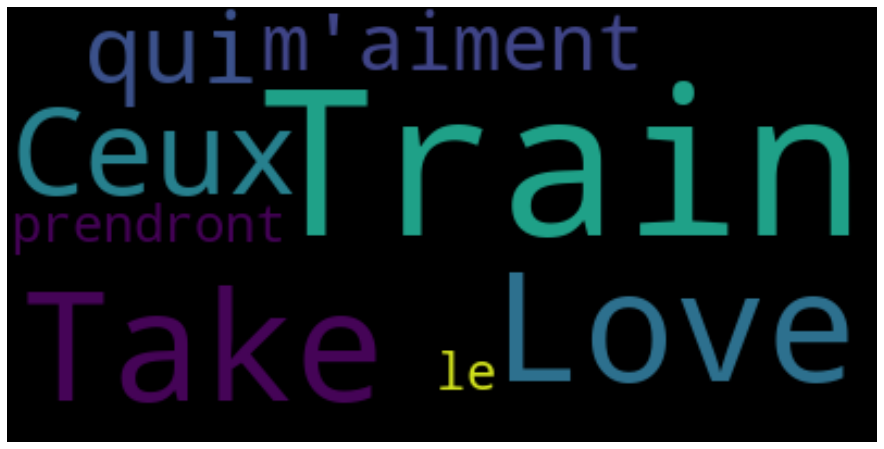

In [ ]:

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

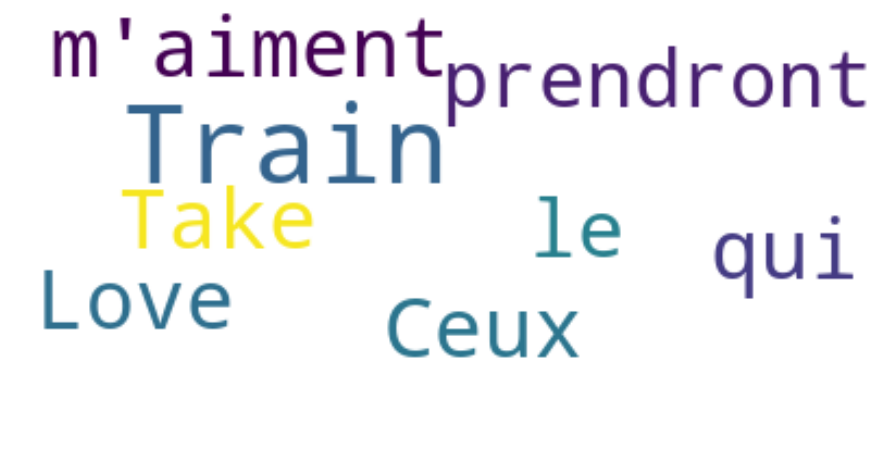

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#ara utilitzarem tots els titols!
text = " ".join(title for title in movies_genre.title)
print ("There are {} words in the combination of all titles.".format(len(text)))

There are 121834 words in the combination of all titles.


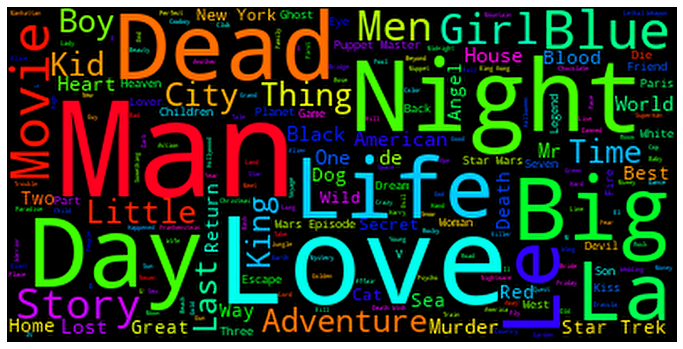

In [ ]:
plt.subplots(figsize=(12, 10))
# Create stopword list, treurem les paraules que no aportin significat (the, an, a, etc!)
stopwords = set(STOPWORDS)
stopwords.update(["the", "an", "a", "in", "of", "for", 'II', 'III'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, colormap='gist_rainbow').generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation = 'sinc')
plt.axis("off")
plt.show()
wordcloud.to_file(r"Plots\07_Wordcloud_titols.png")

In [ ]:
#probarem de fer el wordcloud amb una determinada forma
from PIL import Image

In [ ]:
carrete = np.array(Image.open("carrete.png"))
carrete.shape

(771, 650, 3)

La imatge que utilitzarem per fer el WordCloud és la següent:


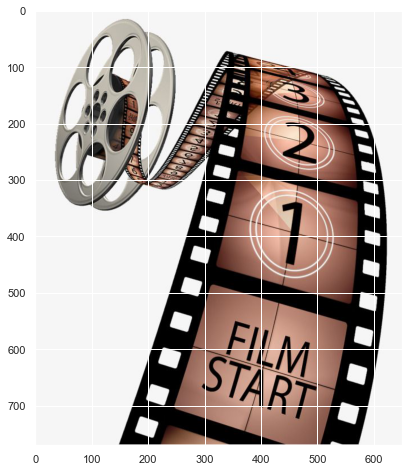

In [ ]:
print('La imatge que utilitzarem per fer el WordCloud és la següent:')
plt.imshow(carrete)
plt.show()

In [ ]:
transformed_carrete = np.ndarray((carrete.shape[0], carrete.shape[1], carrete.shape[2]), np.int32)
transformed_carrete

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]])

In [ ]:
transformed_carrete = np.where(carrete!=246, carrete, 255)
transformed_carrete

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

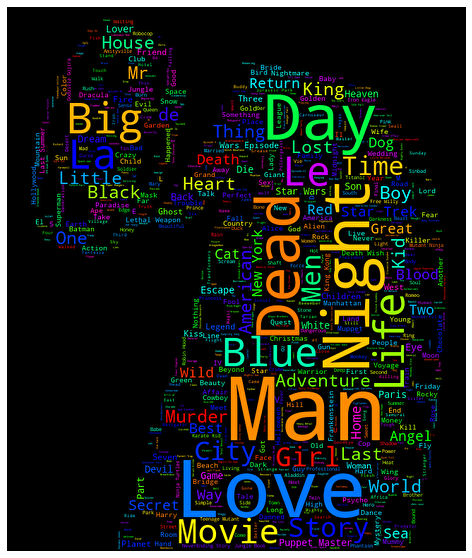

In [ ]:
# Create a word cloud image
wc = WordCloud(background_color="black", max_words=1000, mask=transformed_carrete,
               colormap='gist_rainbow', stopwords=stopwords, contour_width=0.2, contour_color='black')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file(r"Plots\08_wordcloud_carrete.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='sinc')
plt.axis("off")
plt.show()

No s'aprecia gaire! però queda divertit :)